# Load Location Data Repositories

This notebook demonstrates how *OptiWindNet* can load all `osm.pbf` and `.yaml` files from a directory into a *namedtuple* of *networkx* graphs, which can be used to initialize a `WindFarmNetwork()` instance.

## Import required modules

To use this functionality we need `load_repository()` as well as `WindFarmNetwork`.

In [14]:
from optiwindnet.api import WindFarmNetwork, load_repository

In [15]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

## Load a repository

`load_repository()` reads the `.osm.pbf` and `.yaml` locations distributed with *OptiWindNet* into a *namedtuple* of *networkx* graphs containing location data.

>Note: if no argument is passed to the function, it loads the default locations included in the *OptiWindNet* repository. However, the user can also provide a custom repository containing `.osm.pbf` and `.yaml` files by:
>
>```python
>   locations = load_repository(path='path to the repository folder')
>```

In [16]:
locations = load_repository()

In [17]:
len(locations), ', '.join(locations._fields)

(91,
 'anholt, borkum, borkum2, borssele, butendiek, cazzaro_2022, cazzaro_2022G140, cazzaro_2022G210, dantysk, doggerA, dudgeon, anglia, gode, gabbin, gwynt, horns, horns2, horns3, hornsea, hornsea2w, london, morayeast, moraywest, ormonde, race, rampion, rødsand2, sofia, taylor_2023, thanet, triton, walney1, walney2, walneyext, sands, yi_2019, albatros, amrumbank, arkona, baltic2, eagle, bard, beatrice, belwind, nanpeng, rudongdemo, bucht, fecamp, galloper, gemini1, gemini2, glotech1, hohesee, kustzuid, humber, kaskasi, kfA, kfB, bodhi, lillgrund, lincs, luchterduinen, meerwind, merkur, mermaid, neart, nordsee, nordseeost, norther, northwind, nysted, amalia, rental, riffgat, robin, rudongH10, rudongH6, rudongH8, brieuc, nazaire, sandbank, seagreen, shengsi2, sheringham, binhainorthH2, triborkum, vejamate, vineyard, rough, wikinger, jiaxing1')

Each location is loaded as a *networkx* graph containing location data.

In [18]:
type(locations.seagreen)

networkx.classes.graph.Graph

## Use loaded locations

Initialize an instance of `WindFarmNetwork` with one of the locations (e.g. seagreen).

In [19]:
wfn = WindFarmNetwork(L=locations.seagreen, cables=[(2, 1500.0), (5, 1800.0)])

### Plot location

> Note: We could use `wfn_plot_location()` for plotting the location. For more details look into the notebook about [plotting](a04_Plotting.ipynb)

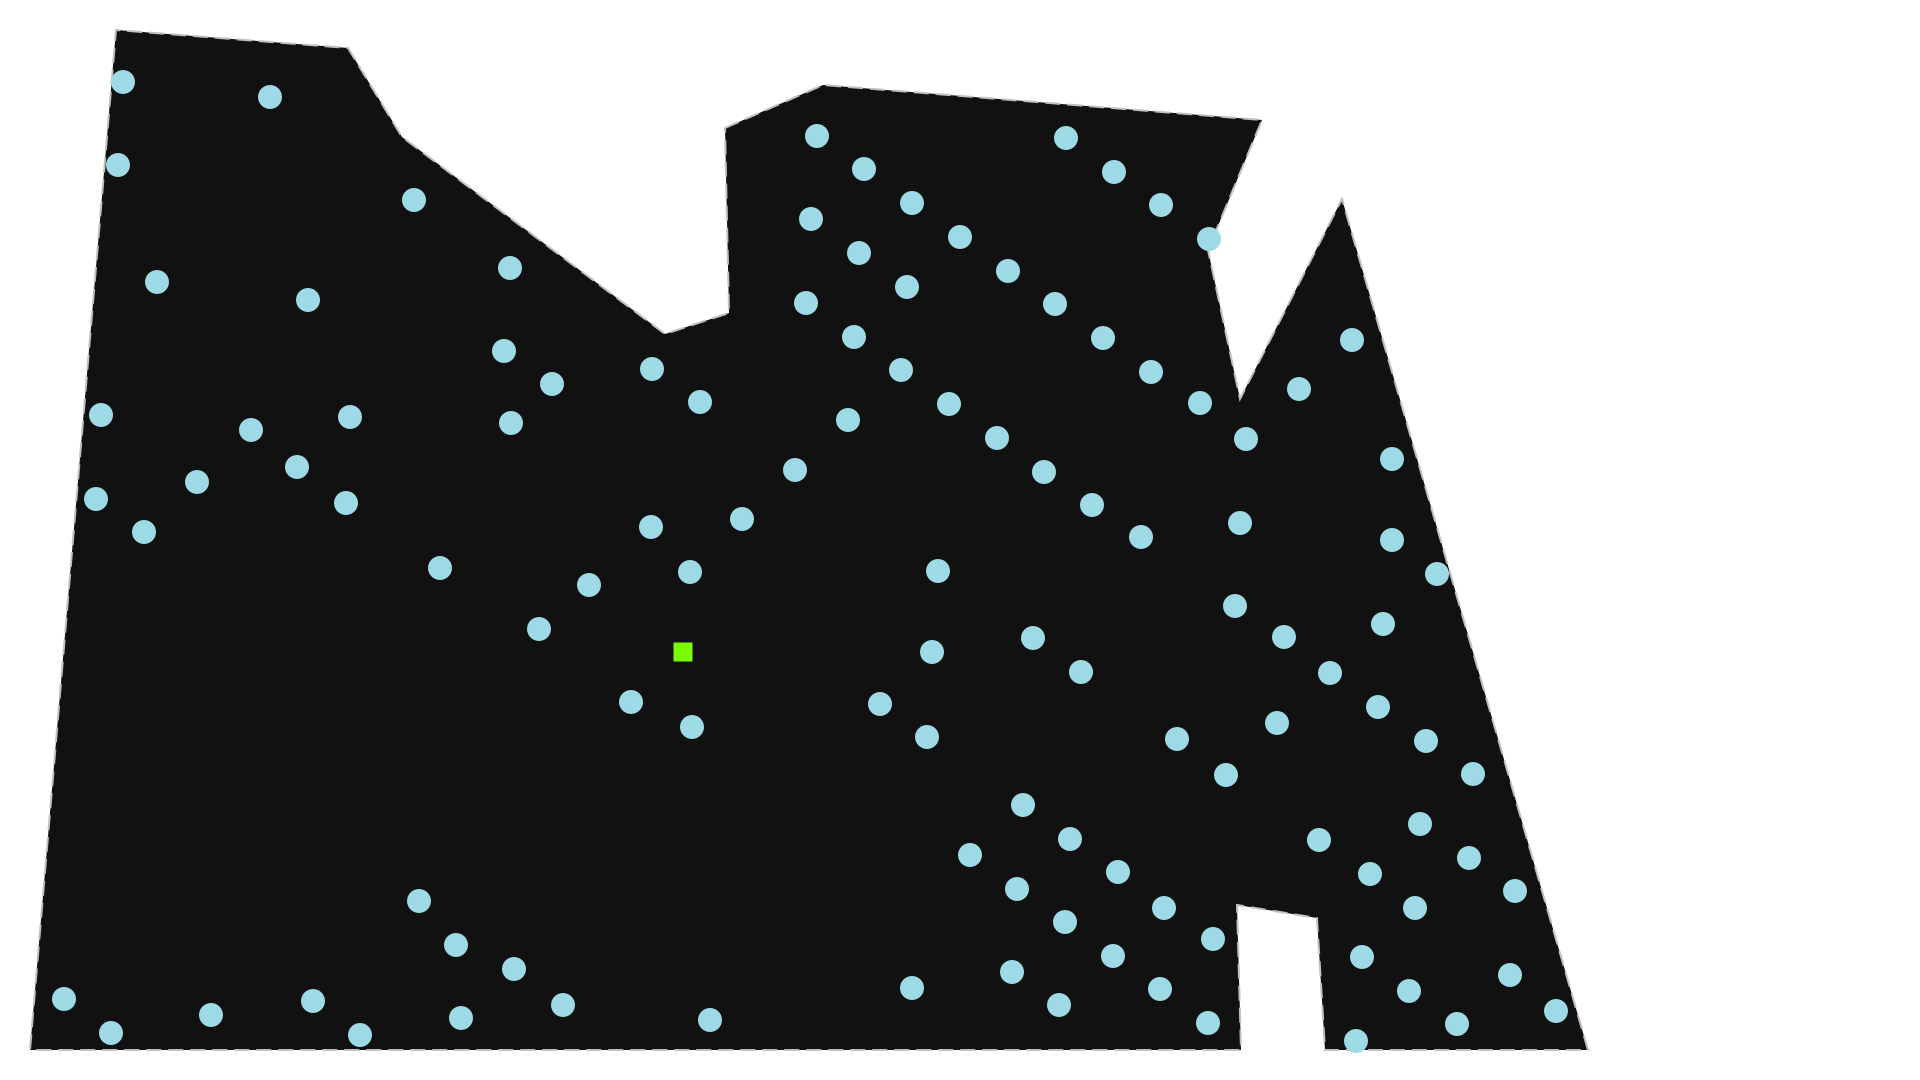

In [20]:
wfn

## List locations in the loaded repository

Print (for all available locations):
- `name`
- `R`: number of Roots (Substations)
- `T`: number of Terminals (Turbines)

In [21]:
for L in locations:
    print(L.graph['handle'], ':', L.graph['name'], '->',
          L.graph['R'], ',', L.graph['T'])

anholt : Anholt -> 1 , 111
borkum : Borkum Riffgrund 1 -> 1 , 78
borkum2 : Borkum Riffgrund 2 -> 1 , 52
borssele : Borssele -> 2 , 173
butendiek : Butendiek -> 1 , 80
cazzaro_2022 : Cazzaro-2022 -> 1 , 50
cazzaro_2022G140 : Cazzaro-2022G-140 -> 3 , 140
cazzaro_2022G210 : Cazzaro-2022G-210 -> 3 , 210
dantysk : DanTysk -> 1 , 80
doggerA : Dogger Bank A -> 1 , 95
dudgeon : Dudgeon -> 1 , 67
anglia : East Anglia ONE -> 1 , 102
gode : Gode Wind 1 -> 1 , 55
gabbin : Greater Gabbard Inner -> 1 , 102
gwynt : Gwynt y Mor -> 2 , 160
horns : Horns Rev 1 -> 1 , 80
horns2 : Horns Rev 2 -> 1 , 91
horns3 : Horns Rev 3 -> 1 , 49
hornsea : Hornsea One -> 3 , 174
hornsea2w : Hornsea Two West -> 1 , 110
london : London Array -> 2 , 175
morayeast : Moray East -> 3 , 100
moraywest : Moray West -> 2 , 60
ormonde : Ormonde -> 1 , 30
race : Race Bank -> 2 , 91
rampion : Rampion -> 1 , 116
rødsand2 : Rødsand 2 -> 1 , 90
sofia : Sofia -> 1 , 100
taylor_2023 : Taylor-2023 -> 2 , 122
thanet : Thanet -> 1 , 100
tr

Any of the locations in this list can be directly passed to `WindFarmNetwork` instance as `L` graph, e.g.:
```python
    wfn = WindFarmNetwork(L=locations.seagreen, cables=7)
```